#**Project Title: Human Activity Recognition using Smartphones**

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import timeit
from sklearn.metrics import accuracy_score
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

In [ ]:
from sklearn import tree

In [ ]:
mesh_step_size = 0.02

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [ ]:
print("Null values present in training data: {}".format(train.isnull().values.any()))
print("Null values present in testing data: {}".format(test.isnull().values.any()))


Null values present in training data: False
Null values present in testing data: False


In [ ]:
train.shape

(7352, 563)

In [ ]:
# Get X and y for training data
X_train = train.drop(columns = ['Activity', 'subject'])
y_train = train["Activity"]


In [ ]:
set(train.Activity)

{'LAYING',
 'SITTING',
 'STANDING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS'}

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text major ticklabel objects>)

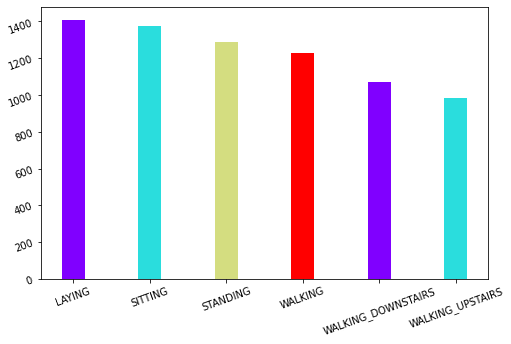

In [ ]:
count_of_each_activity = np.array(y_train.value_counts())
activities = sorted(y_train.unique())
colors = cm.rainbow(np.linspace(0, 1, 4))
plt.figure(figsize=(8,5))
plt.bar(activities,count_of_each_activity,width=0.3,color=colors)
plt.xticks(rotation=20,fontsize=10)
plt.yticks(rotation=20,fontsize=10)

 We can see that data size for each activity is equally distributed.

#**Feature selection (Tree-based)** 


In [ ]:
features = train.iloc[:,0:562]
label = train['Activity']
classifier = ExtraTreesClassifier()
classifier = classifier.fit(features, label)
treeclassifer_model = SelectFromModel(classifier, prefit=True)
New_features = treeclassifer_model.transform(features)
print(New_features.shape)

(7352, 161)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



#**Feature selection (L1-Based)**


In [ ]:
linearsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, label)
svc_model = SelectFromModel(linearsvc, prefit=True)
New_features_2 = svc_model.transform(features)
print(New_features_2.shape)

(7352, 110)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



#**Fitting Classifiers**

In [ ]:
Classifiers = [DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200), LogisticRegression(random_state = 0)]

In [ ]:
test_features= test.iloc[:,0:562]
no_feat_time=[]
no_feat_model=[]
no_feat_accuracy=[]
for classifier in Classifiers:
    start_time = timeit.default_timer()
    fit=classifier.fit(features,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    no_feat_time.append(elapsed)
    no_feat_model.append(classifier.__class__.__name__)
    no_feat_accuracy.append(accuracy_score(test['Activity'],pred))
    

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



:2. Training, Testing and Evaluating the three ML algorithms 



In [ ]:
test_features= treeclassifer_model.transform(test.iloc[:,0:562])
tree_time=[]
tree_model=[]
tree_accuracy=[]
for classifier in Classifiers:
    start_time = timeit.default_timer()
    fit=classifier.fit(New_features,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    tree_time.append(elapsed)
    tree_model.append(classifier.__class__.__name__)
    tree_accuracy.append(accuracy_score(test['Activity'],pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
test_features= svc_model.transform(test.iloc[:,0:562])
svc_time=[]
svc_model_init=[]
svc_accuracy=[]
for classifier in Classifiers:
    start_time = timeit.default_timer()
    fit=classifier.fit(New_features_2,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    svc_time.append(elapsed)
    svc_model_init.append(classifier.__class__.__name__)
    svc_accuracy.append(accuracy_score(test['Activity'],pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#**Accuracy**


Accuracy without Feature selection - 
[0.8642687478791992, 0.9246691550729556, 0.9524940617577197]
[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]

Accuracy with Tree based feature selection -  
[0.8489989820156091, 0.9121140142517815, 0.9477434679334917]
[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]

Accuracy with L1-based feature selection - 
[0.8561248727519511, 0.9107567017305734, 0.9518154054971157]
[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]



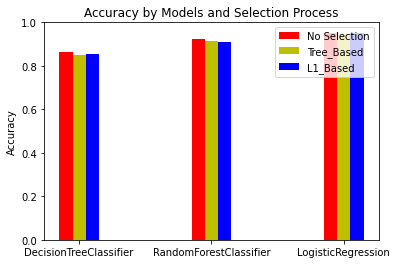

In [ ]:
%matplotlib inline
ind =  np.arange(3)   # the x locations for the groups
width = 0.1       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, no_feat_accuracy, width, color='r')
rects2 = ax.bar(ind + width, tree_accuracy, width, color='y')
rects3 = ax.bar(ind + width + width ,svc_accuracy, width, color='b')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(svc_model_init,rotation=0)
ax.legend((rects1[0], rects2[0], rects3[0]), ('No Selection', 'Tree_Based','L1_Based'))
print("Accuracy without Feature selection - ")
print(no_feat_accuracy)
print("[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]\n")

print("Accuracy with Tree based feature selection -  ")
print(tree_accuracy)
print("[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]\n")

print("Accuracy with L1-based feature selection - ")
print(svc_accuracy)
print("[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]\n")


plt.show()

#**Running Time**

Running Time without Feature selection - 
[5.379408539999986, 25.39565224800026, 3.705062046999956]
[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]

Running Time with Tree based feature selection -  
[1.4733541800001149, 12.516295610999805, 1.5546306299997923]
[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]

Running Time with L1-based feature selection - 
[1.0533842499999082, 10.44622219799976, 1.2134166069999992]
[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]



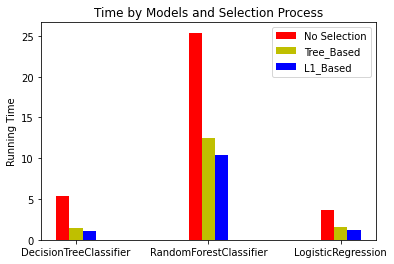

In [ ]:
%matplotlib inline
ind =  np.arange(3)   # the x locations for the groups
width = 0.1       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, no_feat_time, width, color='r')
rects2 = ax.bar(ind + width, tree_time, width, color='y')
rects3 = ax.bar(ind + width + width ,svc_time, width, color='b')
ax.set_ylabel('Running Time')
ax.set_title('Time by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(svc_model_init,rotation=0)
ax.legend((rects1[0], rects2[0], rects3[0]), ('No Selection', 'Tree_Based','L1_Based'))
print("Running Time without Feature selection - ")
print(no_feat_time)
print("[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]\n")

print("Running Time with Tree based feature selection -  ")
print(tree_time)
print("[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]\n")

print("Running Time with L1-based feature selection - ")
print(svc_time)
print("[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]\n")
plt.show()